<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [0]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-05-09 12:55:38.373534


In [0]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [0]:
def state_chart(deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')

    plt.show()

In [0]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [0]:
# All States
states = pop['State'].tolist()
states.sort()

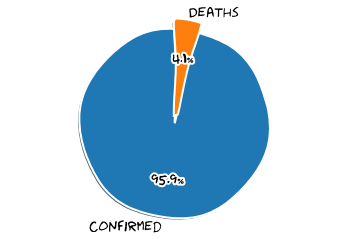

Alabama State Total Population
4887871
Alabama State Confirmed
9385 (0.19200588558904277% of population)
Alabama State Deaths
383 (4.080980287693127% of confirmed)



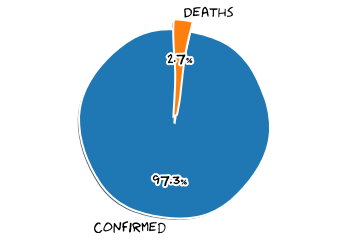

Alaska State Total Population
737438
Alaska State Confirmed
377 (0.051122941860875085% of population)
Alaska State Deaths
10 (2.6525198938992043% of confirmed)



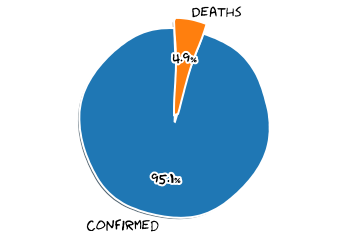

Arizona State Total Population
7171646
Arizona State Confirmed
10526 (0.1467724424769432% of population)
Arizona State Deaths
516 (4.902147064411933% of confirmed)



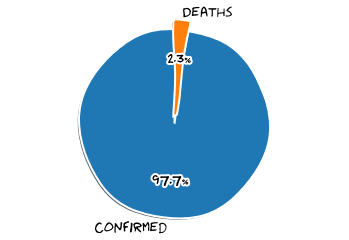

Arkansas State Total Population
3013825
Arkansas State Confirmed
3747 (0.12432705946762006% of population)
Arkansas State Deaths
88 (2.348545503069122% of confirmed)



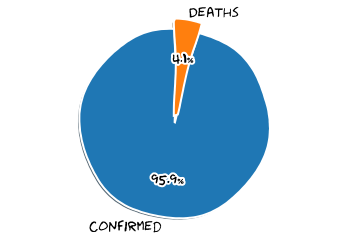

California State Total Population
39557045
California State Confirmed
63779 (0.16123297379771417% of population)
California State Deaths
2613 (4.096959814358958% of confirmed)



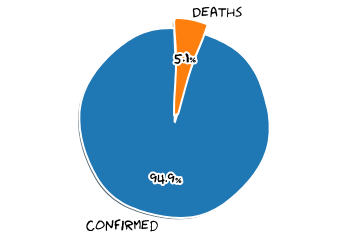

Colorado State Total Population
5695564
Colorado State Confirmed
18827 (0.3305554989813125% of population)
Colorado State Deaths
958 (5.088436819461411% of confirmed)



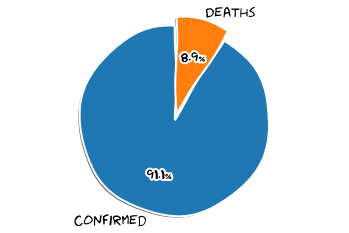

Connecticut State Total Population
3572665
Connecticut State Confirmed
32411 (0.9071939294616204% of population)
Connecticut State Deaths
2874 (8.867359846965536% of confirmed)



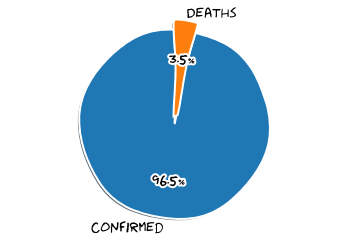

Delaware State Total Population
967171
Delaware State Confirmed
6111 (0.6318427661706152% of population)
Delaware State Deaths
213 (3.4855179185076093% of confirmed)



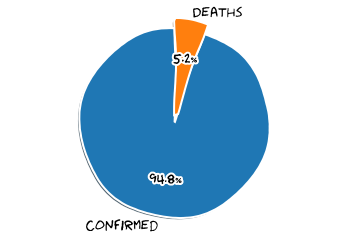

District of Columbia State Total Population
702455
District of Columbia State Confirmed
5899 (0.8397690955292509% of population)
District of Columbia State Deaths
304 (5.153415833192066% of confirmed)



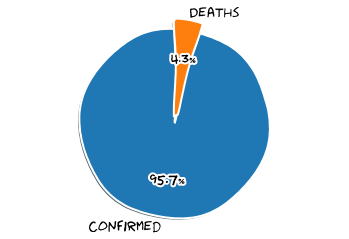

Florida State Total Population
21299325
Florida State Confirmed
39199 (0.1840386960619644% of population)
Florida State Deaths
1669 (4.257761677593816% of confirmed)



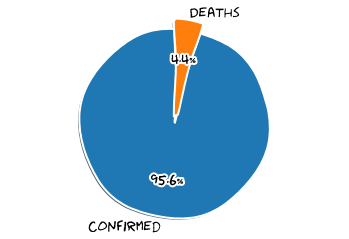

Georgia State Total Population
10519475
Georgia State Confirmed
32181 (0.30591830866084097% of population)
Georgia State Deaths
1400 (4.3503930890898355% of confirmed)



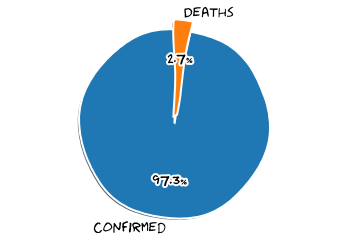

Hawaii State Total Population
1420491
Hawaii State Confirmed
629 (0.044280463586182525% of population)
Hawaii State Deaths
17 (2.7027027027027026% of confirmed)



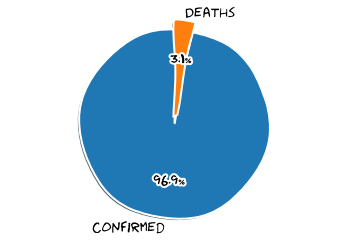

Idaho State Total Population
1754208
Idaho State Confirmed
2178 (0.12415859464784107% of population)
Idaho State Deaths
67 (3.076216712580349% of confirmed)



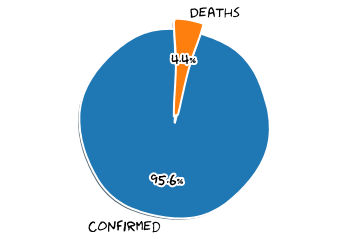

Illinois State Total Population
12741080
Illinois State Confirmed
73760 (0.5789148172682379% of population)
Illinois State Deaths
3241 (4.393980477223428% of confirmed)



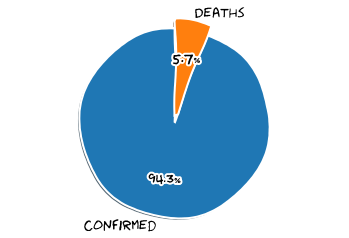

Indiana State Total Population
6691878
Indiana State Confirmed
23146 (0.345881978123331% of population)
Indiana State Deaths
1328 (5.737492439298367% of confirmed)



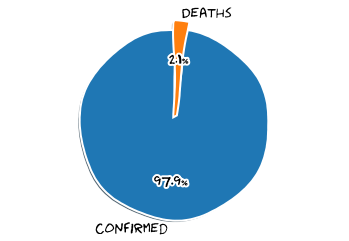

Iowa State Total Population
3156145
Iowa State Confirmed
11457 (0.3630061356496612% of population)
Iowa State Deaths
243 (2.1209740769835035% of confirmed)



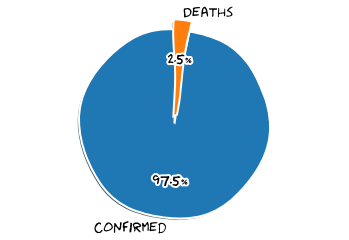

Kansas State Total Population
2911510
Kansas State Confirmed
6667 (0.2289877074095572% of population)
Kansas State Deaths
168 (2.519874006299685% of confirmed)



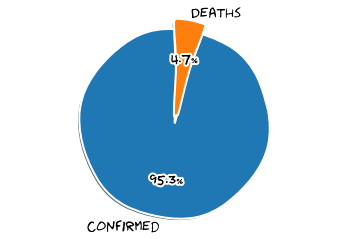

Kentucky State Total Population
4468402
Kentucky State Confirmed
6288 (0.14072144807024972% of population)
Kentucky State Deaths
298 (4.739185750636132% of confirmed)



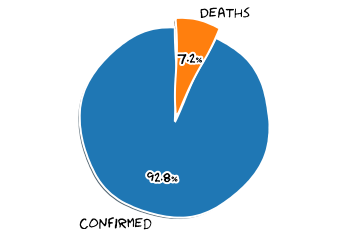

Louisiana State Total Population
4659978
Louisiana State Confirmed
30855 (0.6621275894435553% of population)
Louisiana State Deaths
2227 (7.21763085399449% of confirmed)



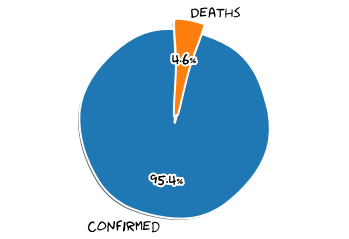

Maine State Total Population
1338404
Maine State Confirmed
1374 (0.1026595855959785% of population)
Maine State Deaths
63 (4.585152838427948% of confirmed)



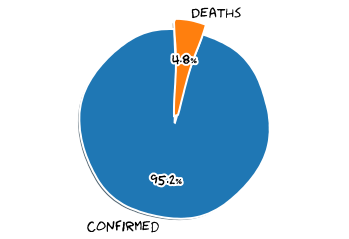

Maryland State Total Population
6042718
Maryland State Confirmed
30485 (0.5044915218615199% of population)
Maryland State Deaths
1461 (4.792520911923897% of confirmed)



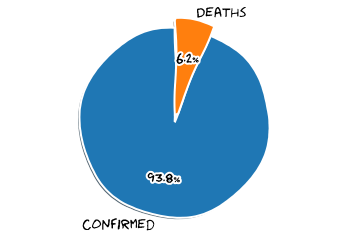

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
75333 (1.0914426796639713% of population)
Massachusetts State Deaths
4702 (6.241620538143974% of confirmed)



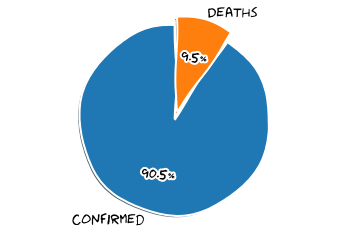

Michigan State Total Population
9995915
Michigan State Confirmed
46386 (0.46404956424699495% of population)
Michigan State Deaths
4399 (9.483464838528867% of confirmed)



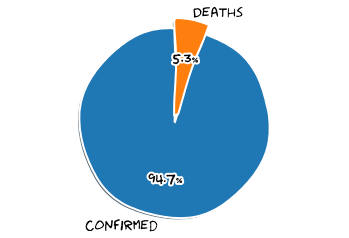

Minnesota State Total Population
5611179
Minnesota State Confirmed
10088 (0.1797839634059081% of population)
Minnesota State Deaths
534 (5.2934179222839015% of confirmed)



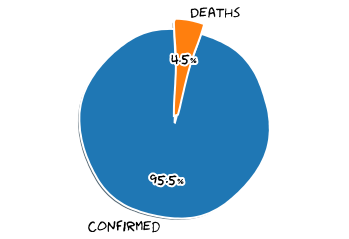

Mississippi State Total Population
2986530
Mississippi State Confirmed
9090 (0.30436660606121485% of population)
Mississippi State Deaths
409 (4.499449944994499% of confirmed)



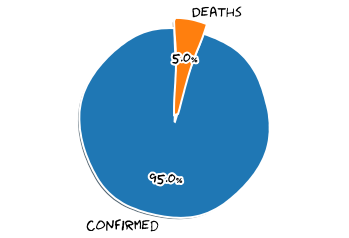

Missouri State Total Population
6126452
Missouri State Confirmed
9733 (0.15886846089710652% of population)
Missouri State Deaths
483 (4.962498715709442% of confirmed)



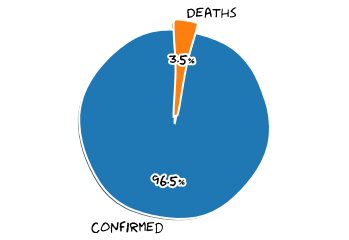

Montana State Total Population
1062305
Montana State Confirmed
458 (0.04311379500237691% of population)
Montana State Deaths
16 (3.4934497816593884% of confirmed)



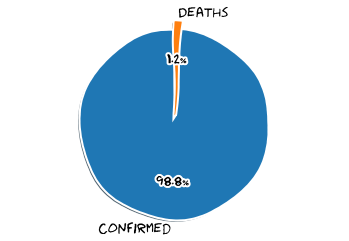

Nebraska State Total Population
1929268
Nebraska State Confirmed
7818 (0.40523141419439906% of population)
Nebraska State Deaths
90 (1.1511895625479662% of confirmed)



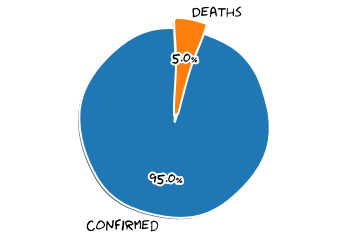

Nevada State Total Population
3034392
Nevada State Confirmed
5920 (0.19509674425716914% of population)
Nevada State Deaths
294 (4.966216216216216% of confirmed)



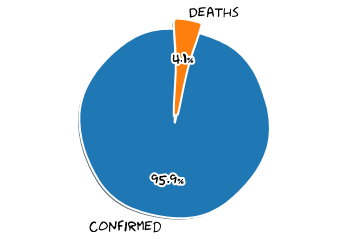

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
2947 (0.21725700316559746% of population)
New Hampshire State Deaths
121 (4.105870376654225% of confirmed)



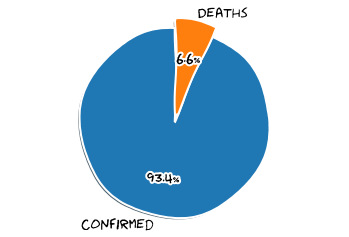

New Jersey State Total Population
8908520
New Jersey State Confirmed
135840 (1.524832407627754% of population)
New Jersey State Deaths
8960 (6.595995288574794% of confirmed)



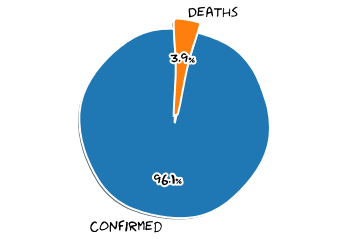

New Mexico State Total Population
2095428
New Mexico State Confirmed
4673 (0.2230093326995726% of population)
New Mexico State Deaths
181 (3.8733147870746847% of confirmed)



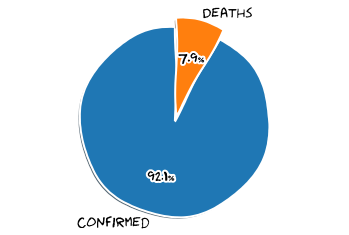

New York State Total Population
19542209
New York State Confirmed
330407 (1.6907351671451267% of population)
New York State Deaths
26243 (7.942628334145462% of confirmed)



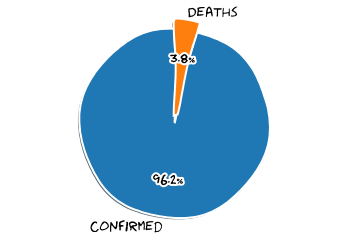

North Carolina State Total Population
10383620
North Carolina State Confirmed
14006 (0.13488552161962786% of population)
North Carolina State Deaths
530 (3.7840925317720977% of confirmed)



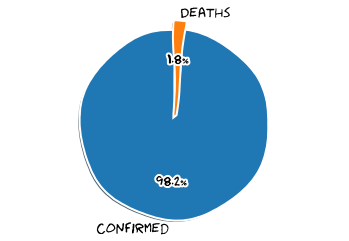

North Dakota State Total Population
760077
North Dakota State Confirmed
1425 (0.18748100521394542% of population)
North Dakota State Deaths
25 (1.7543859649122806% of confirmed)



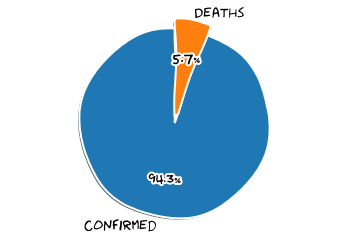

Ohio State Total Population
11689442
Ohio State Confirmed
23016 (0.1968956259845423% of population)
Ohio State Deaths
1306 (5.674313521028849% of confirmed)



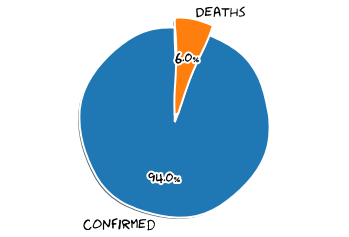

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
4424 (0.11219658546024566% of population)
Oklahoma State Deaths
266 (6.012658227848101% of confirmed)



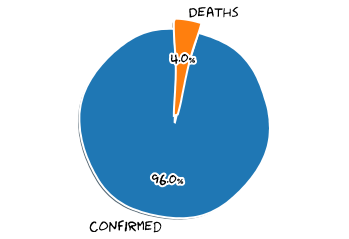

Oregon State Total Population
4190713
Oregon State Confirmed
3068 (0.07320949919500572% of population)
Oregon State Deaths
124 (4.041720990873533% of confirmed)



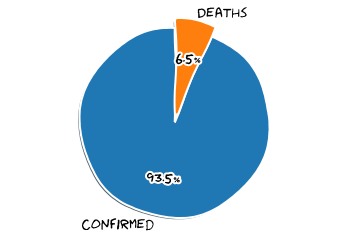

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
57371 (0.4479638574348836% of population)
Pennsylvania State Deaths
3715 (6.475396977567064% of confirmed)



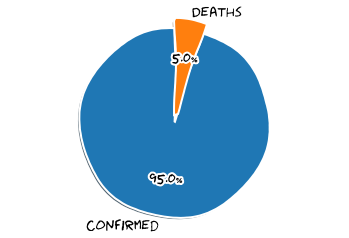

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
2156 (0.06747720688179878% of population)
Puerto Rico State Deaths
107 (4.962894248608534% of confirmed)



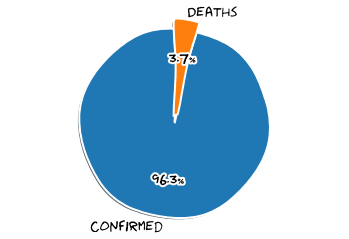

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
10779 (1.0194691269867542% of population)
Rhode Island State Deaths
399 (3.7016420818257725% of confirmed)



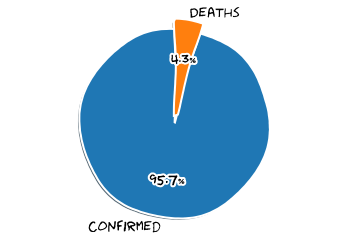

South Carolina State Total Population
5084127
South Carolina State Confirmed
7367 (0.14490196645363107% of population)
South Carolina State Deaths
320 (4.343694855436405% of confirmed)



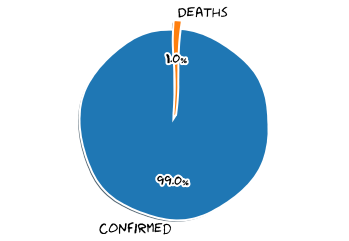

South Dakota State Total Population
882235
South Dakota State Confirmed
3145 (0.3564809829580554% of population)
South Dakota State Deaths
31 (0.985691573926868% of confirmed)



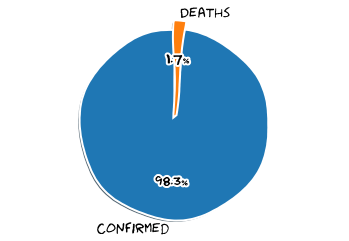

Tennessee State Total Population
6770010
Tennessee State Confirmed
14441 (0.21330839983988206% of population)
Tennessee State Deaths
242 (1.6757842254691502% of confirmed)



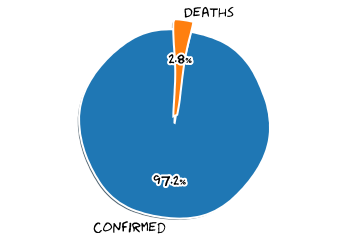

Texas State Total Population
28701845
Texas State Confirmed
37246 (0.12976866121324257% of population)
Texas State Deaths
1025 (2.7519733662675185% of confirmed)



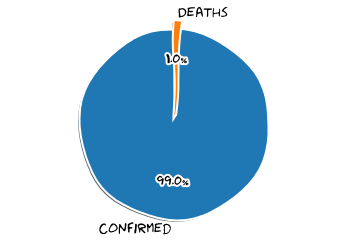

Utah State Total Population
3161105
Utah State Confirmed
5919 (0.18724465020934136% of population)
Utah State Deaths
61 (1.0305794897786789% of confirmed)



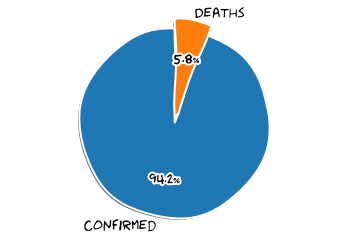

Vermont State Total Population
626299
Vermont State Confirmed
919 (0.14673502592212345% of population)
Vermont State Deaths
53 (5.767138193688792% of confirmed)



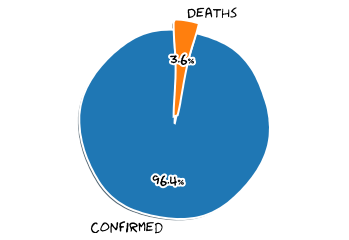

Virginia State Total Population
8517685
Virginia State Confirmed
22342 (0.26230131778763827% of population)
Virginia State Deaths
812 (3.6344105272580793% of confirmed)



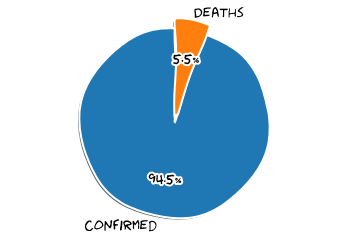

Washington State Total Population
7535591
Washington State Confirmed
16388 (0.21747464797386165% of population)
Washington State Deaths
905 (5.522333414693678% of confirmed)



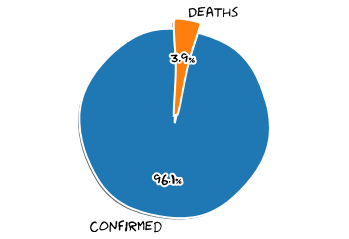

West Virginia State Total Population
1805832
West Virginia State Confirmed
1323 (0.07326262908177505% of population)
West Virginia State Deaths
52 (3.9304610733182166% of confirmed)



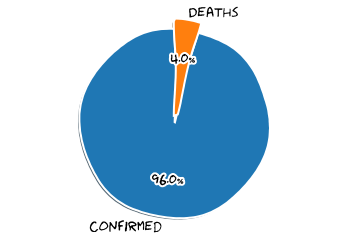

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
9590 (0.16495893743738785% of population)
Wisconsin State Deaths
384 (4.004171011470282% of confirmed)



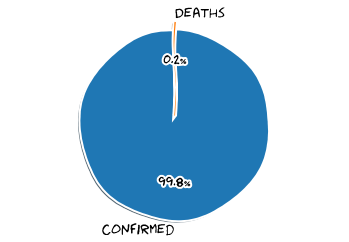

Wyoming State Total Population
577737
Wyoming State Confirmed
644 (0.11146940562920499% of population)
Wyoming State Deaths
1 (0.15527950310559005% of confirmed)



In [9]:
us = pd.DataFrame.from_dict(us_confirmed.json())

for i in states:
    state_details(i)

In [10]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
1283929
US Deaths
76945

New York City Confirmed
181783
New York City Deaths
19561

Philippines Confirmed
10610
Philippines Deaths
704



In [11]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 3959249},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 275328},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-05-09T12:32:29.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 1333094},
 'source': 'https://github.com/mathdroid/covid19'}

In [0]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [13]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey
0,45001,Abbeville,South Carolina,US,2020-05-09 02:32:35,34.22333378,-82.46170658,34,0,0,34,"Abbeville, South Carolina, US"
1,22001,Acadia,Louisiana,US,2020-05-09 02:32:35,30.2950649,-92.41419698,142,11,0,131,"Acadia, Louisiana, US"
2,51001,Accomack,Virginia,US,2020-05-09 02:32:35,37.76707161,-75.63234615,463,7,0,456,"Accomack, Virginia, US"
3,16001,Ada,Idaho,US,2020-05-09 02:32:35,43.4526575,-116.24155159999998,721,19,0,702,"Ada, Idaho, US"
4,19001,Adair,Iowa,US,2020-05-09 02:32:35,41.33075609,-94.47105874,3,0,0,3,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3225,,,,West Bank and Gaza,2020-05-09 02:32:35,31.9522,35.2332,375,2,228,145,West Bank and Gaza
3226,,,,Western Sahara,2020-05-09 02:32:35,24.2155,-12.8858,6,0,5,1,Western Sahara
3227,,,,Yemen,2020-05-09 02:32:35,15.552727,48.516388,34,7,1,26,Yemen
3228,,,,Zambia,2020-05-09 02:32:35,-13.133897,27.849332,167,4,111,52,Zambia


In [14]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1589023952000,40.767273,-73.971526,181783,0,19561,162222,New York City,36061,"New York City, New York, US",2180.484470,None,None,84036061,USA
1,Illinois,US,1589023952000,41.841448,-87.816588,50236,0,2197,48039,Cook,17031,"Cook, Illinois, US",975.412180,None,None,84017031,USA
2,New York,US,1589023952000,40.740665,-73.589419,37812,0,1918,35894,Nassau,36059,"Nassau, New York, US",2786.596744,None,None,84036059,USA
3,New York,US,1589023952000,40.883201,-72.801217,36223,0,1568,34655,Suffolk,36103,"Suffolk, New York, US",2453.133920,None,None,84036103,USA
4,New York,US,1589023952000,41.162784,-73.757417,30905,0,1191,29714,Westchester,36119,"Westchester, New York, US",3194.295436,None,None,84036119,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,Missouri,US,1589023952000,40.479456,-94.423288,1,0,0,1,Worth,29227,"Worth, Missouri, US",49.677099,None,None,84029227,USA
2897,West Virginia,US,1589023952000,37.612327,-81.545111,1,0,0,1,Wyoming,54109,"Wyoming, West Virginia, US",4.903403,None,None,84054109,USA
2898,Alaska,US,1589023952000,65.508155,-151.390739,1,0,0,1,Yukon-Koyukuk,02290,"Yukon-Koyukuk, Alaska, US",19.120459,None,None,84002290,USA
2899,Texas,US,1589023952000,28.866172,-99.760508,1,0,0,1,Zavala,48507,"Zavala, Texas, US",8.445946,None,None,84048507,USA


In [15]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1589023952000,40.767273,-73.971526,181783,0,19561,162222,New York City,36061,"New York City, New York, US",2180.484470,None,None,84036061,USA
2,New York,US,1589023952000,40.740665,-73.589419,37812,0,1918,35894,Nassau,36059,"Nassau, New York, US",2786.596744,None,None,84036059,USA
3,New York,US,1589023952000,40.883201,-72.801217,36223,0,1568,34655,Suffolk,36103,"Suffolk, New York, US",2453.133920,None,None,84036103,USA
4,New York,US,1589023952000,41.162784,-73.757417,30905,0,1191,29714,Westchester,36119,"Westchester, New York, US",3194.295436,None,None,84036119,USA
18,New York,US,1589023952000,41.150279,-74.025605,12349,0,562,11787,Rockland,36087,"Rockland, New York, US",3790.490164,None,None,84036087,USA
20,New York,US,1589023952000,41.403375,-74.302408,9402,0,367,9035,Orange,36071,"Orange, New York, US",2442.458565,None,None,84036071,USA
55,New York,US,1589023952000,42.762490,-78.730637,4255,0,346,3909,Erie,36029,"Erie, New York, US",463.153449,None,None,84036029,USA
68,New York,US,1589023952000,41.764861,-73.743567,3277,0,96,3181,Dutchess,36027,"Dutchess, New York, US",1113.799971,None,None,84036027,USA
113,New York,US,1589023952000,43.146389,-77.693229,1735,0,143,1592,Monroe,36055,"Monroe, New York, US",233.899996,None,None,84036055,USA
132,New York,US,1589023952000,41.890279,-74.262521,1429,0,54,1375,Ulster,36111,"Ulster, New York, US",804.739459,None,None,84036111,USA


In [16]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

330407

In [17]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1589023952000,40.767273,-73.971526,181783,0,19561,162222,New York City,36061,"New York City, New York, US",2180.48447,None,None,84036061,USA


In [18]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
58,None,Philippines,1589027549000,12.879721,121.774017,10610,1842,704,8064,None,None,Philippines,9.682328,None,None,608,PHL,PH


In [19]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
